# MLP example for boolean function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([[0,0,1,1],
            [0,1,0,1],
            [1,1,1,1]])
Y=np.array([[1,0,0,1]])

# model specifications
Ni=3; Nh=4; No=1;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))


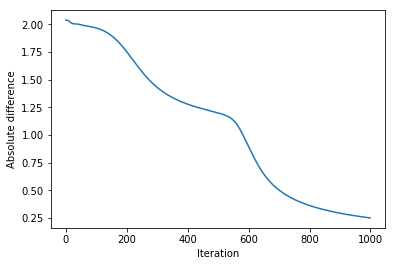

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()


In [8]:
# test all pattern    
for pat in range(4): 
    x=X[:,pat]
    #calculate prediction    
    for ih in range(Nh):  #for each hidden node
        sumInput=0
        for ii in range(Ni):  #loop over input features
            sumInput=sumInput+wh[ih,ii]*x[ii]
            h[ih]=1/(1+np.exp(-sumInput))
    for io in range(No):  #for each output node
        sumInput=0
        for ih in range(Nh):  #loop over inputs from hidden
            sumInput=sumInput+wo[io,ih]*h[ih]
            y[io]=1/(1+np.exp(-sumInput))